In [103]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
import random as rnd
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Read in probability data
prob_df = pd.read_csv('CRISPR_gene_effect.csv')
# Read in labels
label_df = pd.read_csv('sample_info.csv').reset_index()


# Select desired labels only
label_df = label_df[['DepMap_ID', 'lineage', 'sex']]

In [76]:
# Merge data with labels
combined_df = pd.merge(prob_df, label_df, left_on='DepMap_ID', right_on='DepMap_ID')

In [77]:
# Drop NaN columns
combined_df.dropna(axis=0, inplace=True)

In [78]:
# Remove rows with very uncommon cancer lineages (less than 2 rows)
combined_df = combined_df.groupby('lineage').filter(lambda x: len(x) >= 2)

In [79]:
all_lineages = list(combined_df['lineage'].unique())

In [80]:
def cancer_binary_subset(df, target_lineage):
    # Subset data into target lineage and everything else
    cancer_df = df[df['lineage'] == target_lineage]
    not_cancer_df = df[df['lineage'] != target_lineage]

    # Grab a random sample from the not cancer dataframe
    sample_idxs = rnd.sample(list(not_cancer_df.index), k=len(cancer_df))
    not_cancer_sample = not_cancer_df.loc[sample_idxs]

    # Concatenate the dataframes
    total_df = pd.concat([cancer_df, not_cancer_sample], axis=0)

    # Seperate the features
    X = total_df.drop(columns=['lineage', 'DepMap_ID'])
    X = pd.get_dummies(X)

    # Separate the targets
    y = total_df['lineage'] == target_lineage

    return X, y

In [81]:
logreg = LogisticRegression()
for lineage in all_lineages:
    X, y = cancer_binary_subset(combined_df, lineage)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)
    logreg.fit(X_train, y_train)
    score = logreg.score(X_test,y_test)

    print(f'R2 value for {lineage}: {score}')

R2 value for ovary: 0.8947368421052632
R2 value for blood: 1.0
R2 value for colorectal: 0.7941176470588235
R2 value for urinary_tract: 0.65
R2 value for lung: 0.7790697674418605
R2 value for breast: 0.84375
R2 value for pancreas: 0.7666666666666667
R2 value for plasma_cell: 0.9230769230769231
R2 value for central_nervous_system: 0.8823529411764706
R2 value for soft_tissue: 0.75
R2 value for bone: 0.8846153846153846
R2 value for gastric: 0.7727272727272727
R2 value for lymphocyte: 1.0
R2 value for peripheral_nervous_system: 0.9166666666666666
R2 value for kidney: 0.8888888888888888
R2 value for prostate: 1.0
R2 value for thyroid: 0.5555555555555556
R2 value for upper_aerodigestive: 0.9111111111111111
R2 value for unknown: 1.0
R2 value for uterus: 0.6956521739130435
R2 value for bile_duct: 0.7777777777777778
R2 value for liver: 0.6
R2 value for skin: 0.8372093023255814
R2 value for esophagus: 0.7142857142857143
R2 value for cervix: 0.7272727272727273
R2 value for eye: 0.9


In [117]:
X, y = cancer_binary_subset(combined_df, 'blood')

In [118]:
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

<AxesSubplot:>

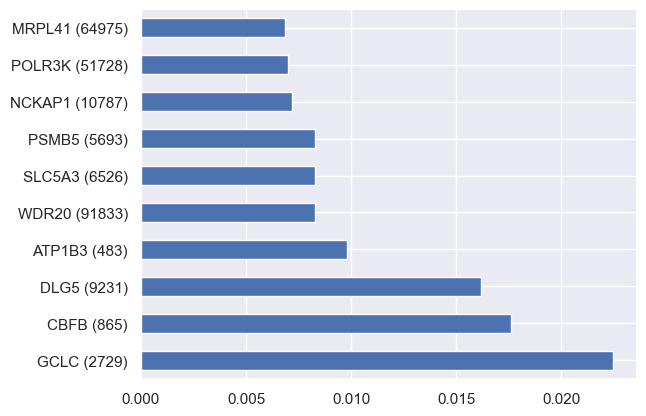

In [119]:
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [111]:
sorted(list(rfc.feature_importances_), reverse=True)

[0.004994342472039581,
 0.004126552625555126,
 0.003548439366963042,
 0.0031535631685536665,
 0.0031052305704444994,
 0.0028845908682984976,
 0.0028252930259752827,
 0.002667193222195104,
 0.0025500138697530034,
 0.002507907572841682,
 0.002506851918398635,
 0.0024331443229235667,
 0.0023079951890725126,
 0.0022303796092644408,
 0.0021658422289119773,
 0.0021499478520474484,
 0.0021381084696716246,
 0.0020889413147861945,
 0.0020061142943940107,
 0.002001854890071806,
 0.0019469945707128592,
 0.0019434184660571787,
 0.001905204204209039,
 0.0018763073656585078,
 0.0018693641394790831,
 0.0018577703430906357,
 0.001831406890938343,
 0.0018109930771067065,
 0.001764044810759912,
 0.0017445607999924772,
 0.0017439993535749482,
 0.001740095654517233,
 0.001720540364583334,
 0.001715468596636934,
 0.0016600599165626235,
 0.0016529747732950734,
 0.0016426805955770585,
 0.0016080138596430236,
 0.0016030905295362175,
 0.0015810999402038558,
 0.001571109286626527,
 0.0015639809342928173,
 0.001